<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/redness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/NoelleI/Pigmentation.git

Cloning into 'Pigmentation'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 725 (delta 44), reused 71 (delta 5), pack-reused 580
Receiving objects: 100% (725/725), 91.22 MiB | 13.03 MiB/s, done.
Resolving deltas: 100% (249/249), done.


In [0]:
import numpy as np
from scipy import ndimage, misc
import re
import os
from datetime import datetime
import matplotlib.pyplot as plt
import skimage


pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [4]:
filenames

['1_F_43_XX_25_20190228_214705_FA101129_0100_SPOTS_57_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR57.jpg',
 '1_F_43_XX_25_20190226_224523_FA101129_0100_SPOTS_24_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR24.jpg',
 '1_F_43_XX_25_20190223_170715_FA101129_0100_SPOTS_XX_SPOTS#01_S_UnitedStates_CND_XX.jpg',
 '1_F_43_XX_25_20190225_100933_FA101129_0100_SPOTS_71_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR71.jpg',
 '1_F_43_XX_25_20190306_230513_FA101129_0100_SPOTS_64_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR64.jpg',
 '1_F_43_XX_25_20190310_203414_FA101129_0100_SPOTS_60_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR60.jpg',
 '1_F_43_XX_25_20190227_212058_FA101129_0100_SPOTS_51_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR51.jpg',
 '1_F_43_XX_25_20190301_083613_FA101129_0100_SPOTS_81_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR81.jpg',
 '1_F_43_XX_25_20190228_083804_FA101129_0100_SPOTS_74_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR74.jpg',
 '1_F_43_XX_25_20190310_104002_FA101129_0100_SPOTS_86_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR

In [5]:
len(pigs)

18

In [6]:
pigs.shape

(18, 480, 640, 3)

In [0]:
##Note that this has been adapted in an ad-hoc way for comparison of Exp 2 to Exp 1 spot 4


import pandas as pd
from scipy import stats
#del str
def measure_score(pigs): 
  
    score = []

    i = 0
    

    for pig in pigs:
        print(i, "\n")
        g = pig[:,:,1].reshape(-1)  #- 3*imagen[:,:,1].reshape(-1)/8
        b = pig[:,:,2].reshape(-1)
            

        if i > 0:

          mg = np.min(g)               ###may need to scroll over earlier days ###
          ag = np.mean(g)
          #sg = stats.skew(g)

          mg_last = np.min(g_last)
          ag_last = np.mean(g_last)
          #sg = stats.skew(g_last)
 
          mb = np.min(b)
          ab = np.mean(b)
          
          mb_last = np.min(b_last)
          ab_last = np.mean(b_last)

          delbaa = np.abs(ab-ab_last)
          delbma = np.abs(mb - mb_last)

          delgaa = np.abs(ag -ag_last)
          delgma = np.abs(mg - mg_last)

          delba = ab-ab_last
          delbm = mb - mb_last

          delga = ag -ag_last
          delgm = mg - mg_last
          

          if delbaa/delgaa >= (1*10**3.25)/(1*10**3.1):
            
            sca = 0
          else:
            sca = delga

          if delbma/delgma >= (1*10**3.25)/(1*10**3.1):
           
            scm = 0
          else:
            scm = delgm

          sc = (sca + scm)/2
          print(sca, scm, sc, "\n")

          




            
          

        else:
          #sc = 0  ###change this
          
          g_last = g_rlast
          b_last = br_last
          
          mg = np.min(g)               ###may need to scroll over earlier days ###
          ag = np.mean(g)
          #sg = stats.skew(g)

          mg_last = np.min(g_last)
          ag_last = np.mean(g_last)
          #sg = stats.skew(g_last)
 
          mb = np.min(b)
          ab = np.mean(b)
          
          mb_last = np.min(b_last)
          ab_last = np.mean(b_last)

          delbaa = np.abs(ab-ab_last)
          delbma = np.abs(mb - mb_last)

          delgaa = np.abs(ag -ag_last)
          delgma = np.abs(mg - mg_last)

          delba = ab-ab_last
          delbm = mb - mb_last

          delga = ag -ag_last
          delgm = mg - mg_last
          

          if delbaa/delgaa >= (1*10**3.25)/(1*10**3.1):
            
            sca = 0
          else:
            sca = delga

          if delbma/delgma >= (1*10**3.25)/(1*10**3.1):
           
            scm = 0
          else:
            scm = delgm

          sc = (sca + scm)/2
          print(sca, scm, sc, "\n")

          


          #print("here min g_last = ", np.min(g_last, "b_last = ", b_last)

        
       
        score += [sc]
        
        i += 1
       
      
        
    
    green_score = np.array(score)
    
    return(green_score)
        

In [28]:

green_score, g_rlast, br_last = measure_score(pigs)

here 2
here 9
here 10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in ubyte_scalars


In [13]:
(1*10**3.25)/(1*10**3.1)

1.412537544622754

Text(0.5, 1.0, 'Experiment 2, Spot 1')

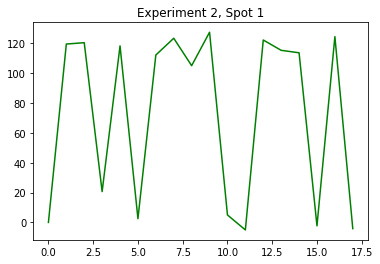

In [14]:

plt.plot(green_score, 'g-')


plt.title('Experiment 2, Spot 1')



In [0]:
#del str
pigs = []
filenames_dict_pigs = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:   ####remember to update in order to avoid masks###
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            #n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            #key = n.group(3)

            #key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            #filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
            n = re.match("(\d*)", filename)
            #print(n.group(), " ")
            #print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            filenames_dict_pigs.update({int(n.group()): [os.path.join(root, filename), filename]})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict_pigs.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict_pigs[key][0])
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [45]:
#del str
green_score, g_rlast, br_last = measure_score(pigs)


here 1
here 2
here 3
here 10
here 14
here 15
here 19
here 20
here 26


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in float_scalars


Text(0.5, 1.0, 'Experiment 1, Spot 4')

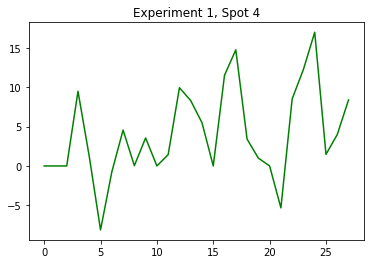

In [46]:
green_score = 255*green_score
g_rlast = 255*g_rlast
br_last = 255*br_last
plt.plot(green_score, 'g-')

plt.title('Experiment 1, Spot 4')

In [43]:
green_score

array([165., 165., 166., ..., 159., 160., 161.], dtype=float32)

In [0]:
pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [69]:
#del str
green_score = measure_score(pigs)

0 

-18.771806640624987 0 -9.385903320312494 

1 

0 0 0.0 

2 

0 -24.0 -12.0 

3 

-14.577958984374987 -34.0 -24.288979492187494 

4 

2.553450520833337 0 1.2767252604166686 

5 

7.440722656249989 -2.0 2.7203613281249943 

6 

8.226692708333331 -14.0 -2.8866536458333343 

7 

8.888554687500005 0 4.444277343750002 

8 

14.019632161458333 18.0 16.009816080729166 

9 

10.981458333333336 -5.0 2.990729166666668 

10 

5.311435546875003 -32.0 -13.344282226562498 

11 

0 14.0 7.0 

12 

0 0 0.0 

13 

3.7711523437500034 0 1.8855761718750017 

14 

0 -8.0 -4.0 

15 

7.4822688802083235 0 3.7411344401041617 

16 

-5.335195312499991 -13.0 -9.167597656249995 

17 

10.814417317708347 -13.0 -1.0927913411458263 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in float_scalars


Text(0.5, 1.0, 'Experiment 2, Spot 4')

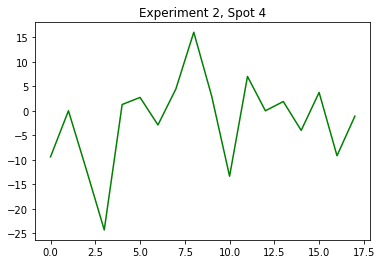

In [70]:


plt.plot(green_score, 'g-')

plt.title('Experiment 2, Spot 4')

In [0]:
pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 2"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [22]:
green_score = measure_score(pigs)

here
here 4
here 5
here 6
here 9
here 10
here 16
here 17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in ubyte_scalars


Text(0.5, 1.0, 'Experiment 2, Spot 2')

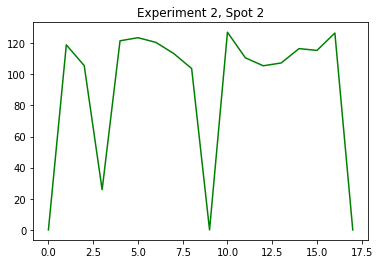

In [23]:

plt.plot(green_score, 'g-')
#plt.plot(blue, 'b-')
plt.title('Experiment 2, Spot 2')

In [0]:
red

array([ 92,  88,  88, 104,  81,  71,  79,  82,  84,  86,  86,  93,  97,
        82,  97,  70,  93,  84], dtype=uint8)